<a href="https://colab.research.google.com/github/Safwana-Hussain/Credit-Risk-Data-Analysis/blob/main/Credit_Risk_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Reading dataset

In [ ]:
data= pd.read_csv('/content/credit_risk_dataset..csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
1,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
2,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
3,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
4,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3


#Shape of the text

In [ ]:
data.shape

(32581, 12)

#Understanding the datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#Data Cleaning

In [ ]:
data.isnull().sum() #Explore Null Values

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


a.Delete null values from 'person_emp_length'

In [ ]:
#(Person_emp_length-- (895/32581)*100 = 2.7% is missing/null value -- I can remove them.

data.dropna(subset=['person_emp_length'], inplace=True)

#Segment wise imputation for 'loan_int_rate'

In [ ]:
#loan_int_rate has (3116/32581)*100  =9.5% is  null value
#imputing the null values with loan grade

mean_loan_int_rate = data.groupby('loan_grade')['loan_int_rate'].mean().reset_index()  #Calculating mean of each loan grade
print(mean_loan_int_rate)

#Imputing mean_loan_int_rate where null

data['loan_int_rate'] = data['loan_int_rate'].fillna(data.groupby('loan_grade')['loan_int_rate'].transform('mean'))
data.isnull().sum()


  loan_grade  loan_int_rate
0          A       7.347094
1          B      11.002471
2          C      13.453041
3          D      15.348901
4          E      17.005655
5          F      18.597321
6          G      20.251525


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


#Statistical Summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,31686.0,27.747302,6.360283,20.00,23.00,26.000000,30.000000,144.00
person_income,31686.0,66691.878306,62427.286689,4000.00,39397.00,56000.000000,80000.000000,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.000000,7.000000,123.00
loan_amnt,31686.0,9661.337815,6336.226458,500.00,5000.00,8000.000000,12500.000000,35000.00
loan_int_rate,31686.0,11.038304,3.208064,5.42,7.90,11.002471,13.453041,23.22
loan_status,31686.0,0.215426,0.411124,0.00,0.00,0.000000,0.000000,1.00
loan_percent_income,31686.0,0.169612,0.106297,0.00,0.09,0.150000,0.230000,0.83
cb_person_cred_hist_length,31686.0,5.809316,4.060867,2.00,3.00,4.000000,8.000000,30.00


1.person_age- * No missing value , *mean 27.73 indicating young population, *min 20 and max 144 is unusual, (I need to investigate 144 and treat it as possible outlier)
2. person_income - *No missing value, * Mean indicating middle income family, * higher max value indication possible outlier or data entry , (I will investigate the high income, as it will distoort analysis.Will also consider log transformation or categorize income for effective modelling)
3. peraon_emp_length-- *missing values , *max value being suspicious. (I will investigate the max employment length and treat null values.)
4.loan amount-- * no missing values , *min and max values seems reasonable (Whole distribution of this data looks normal. Insvestigating relationship between loan amount and person income could give a better insight into credit risk.)
5. loan_int_rate --*missing value * min and max range is 5.42-23.22 , indicating higher interest rate being higher risk , (Considering imputing missing value using segment wise imputing )
6.loan_status -- * no missing value , * mean 0.21 indicating 21% loans are not fully paid .
7. loan_percent_income - *no missing value , * mean value .17 indicating on average 17% of people's income is allocated for loan repayment. (High loan percentage indicates higher risk. Considering analyzing how this metric corelates with loan status and interest rate. )
8. cb_person_cred_hist_length - * nno missing value  ,  *min/max ranges 2-30 y rs.  (Higher his length suggest lower risk . Cosidering analyzing it with loan status and interest rate for asseessing the risk better.)

#Feature Engineering
Create New Features Relevant to Credit Eligibility

a. Creating Feature for the group who has no employment length but has income

In [ ]:
#Entries with 0 'person_emp_length'

zero_emp_length = data[data['person_emp_length'] == 0].shape[0]
print(f"Number of entries with employment_length of 0 is  {zero_emp_length}")

data['has_income_no_emp'] = np.where((data['person_income'] > 0) & (data['person_emp_length'] == 0), 1, 0)
data['has_income_no_emp'] = data['has_income_no_emp'].astype(str)

#1 indicates that the person has income but no employment length.
#0 means that the person has employment length.


Number of entries with employment_length of 0 is  4105


b. Age Group Identification

In [ ]:
data['age_group'] = pd.cut(data['person_age'], bins=[0 , 15, 25 , 45, 65, 90, 150] , labels=['0-15', '16-25','26-45', '46-65', '66-90' ,'91-150'])

data['age_group'] = data['age_group'].astype(str)


c. Income Range Identification

In [ ]:
data['income_range'] = pd.cut(data['person_income'], [0, 50000, 100000, 200000, 400000 ,600000, 800000, 1000000, 3000000]
                            , labels= ['0-50000','50001-100000', '100001-200000', '200001-400000', '400001-600000', '600001-800000', '800001-1000000',  '1000001-3000000'] )

data['income_range'] = data['income_range'].astype(str)

# Show the filtered result
data.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,has_income_no_emp,age_group,income_range
0,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25,0,91-150,nan
1,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3,0,91-150,200001-400000
2,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2,0,91-150,100001-200000
3,123,78000,RENT,7.0,VENTURE,B,20000,11.002471,0,0.26,N,4,0,91-150,50001-100000
4,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3,0,91-150,50001-100000


#Removing Outlier

a. Removing Outlier from Person_emp_length

In [ ]:
data = data[data['person_emp_length'] != 123]


b. Removing Outlier from person_age

In [ ]:
# Remove rows where the age group is '91-150' for realistic analysis/Outlier removal
data= data[data['age_group'] != '91-150']

data.describe().T


,count,mean,std,min,25%,50%,75%,max
person_age,31678.0,27.728581,6.202358,20.00,23.00,26.000000,30.000000,84.00
person_income,31678.0,66491.440495,52769.086293,4000.00,39396.00,56000.000000,80000.000000,2039784.00
person_emp_length,31678.0,4.782183,4.034956,0.00,2.00,4.000000,7.000000,41.00
loan_amnt,31678.0,9660.062188,6334.435654,500.00,5000.00,8000.000000,12500.000000,35000.00
loan_int_rate,31678.0,11.038079,3.208167,5.42,7.90,11.002471,13.453041,23.22
loan_status,31678.0,0.215449,0.411140,0.00,0.00,0.000000,0.000000,1.00
loan_percent_income,31678.0,0.169607,0.106269,0.00,0.09,0.150000,0.230000,0.83
cb_person_cred_hist_length,31678.0,5.808542,4.058028,2.00,3.00,4.000000,8.000000,30.00


In [ ]:
#Exporting clean data as new file

df= pd.read_csv('/content/cleaned_credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,has_income_no_emp,age_group,income_range
0,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24,0,66-90,50001-100000
1,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25,0,66-90,50001-100000
2,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25,0,66-90,0-50000
3,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25,0,66-90,50001-100000
4,73,42000,MORTGAGE,7.0,PERSONAL,A,5000,7.49,0,0.12,N,28,0,66-90,0-50000


#Exploratory Data Analysis

# Univariate Aanlysis


Categorical univariate analysis

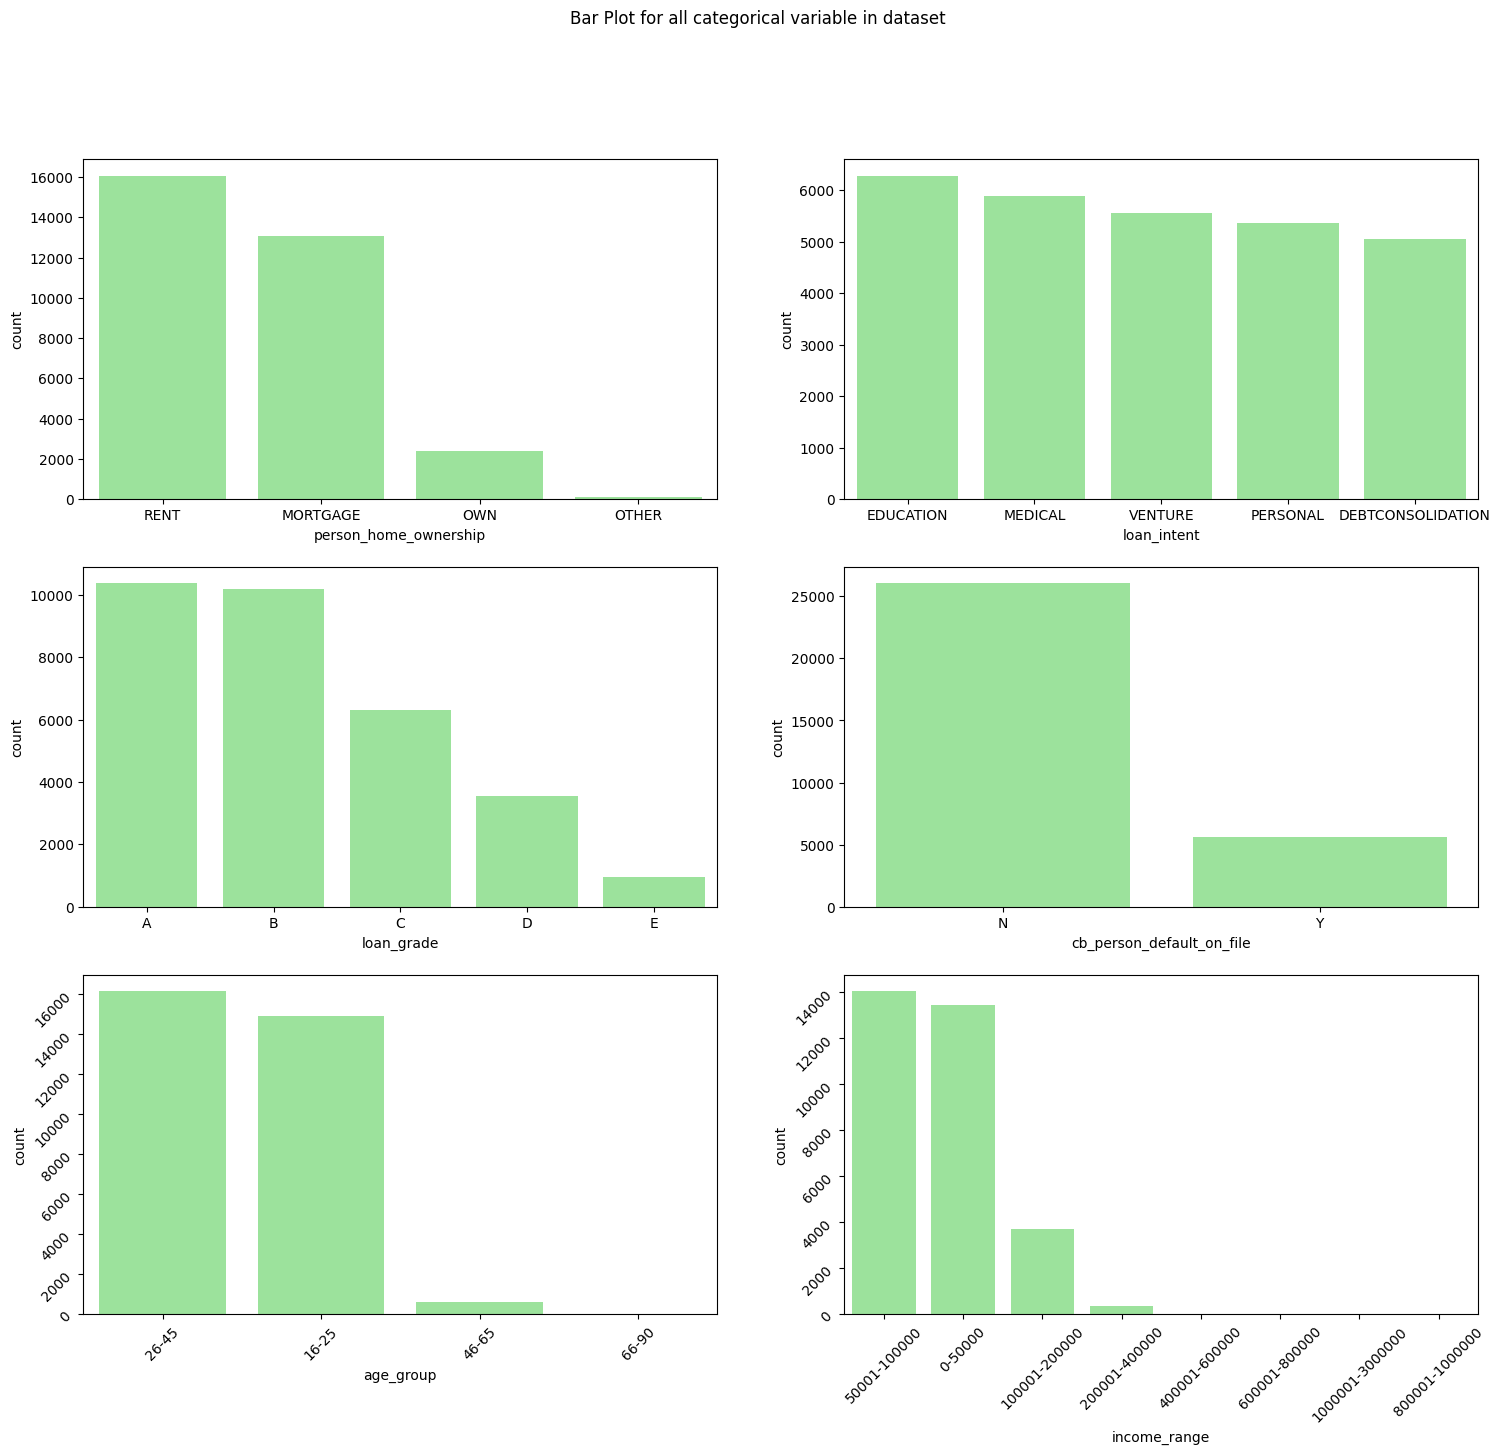

In [ ]:
cat_col = ['person_home_ownership','loan_intent','loan_grade','loan_status','cb_person_default_on_file','age_group','income_range']

fig,axes = plt.subplots(3,2,figsize= (18,15))
fig.suptitle('Bar Plot for all categorical variable in dataset')

sns.countplot(ax=axes[0,0],x=df['person_home_ownership']
            ,color='lightgreen', order = df['person_home_ownership'].value_counts().index)
sns.countplot(ax=axes[0,1],x=df['loan_intent']
              ,color='lightgreen',order = df['loan_intent'].value_counts().head(5).index)
sns.countplot(ax=axes[1,0],x=df['loan_grade']
              ,color='lightgreen',order = df['loan_grade'].value_counts().head(5).index)
sns.countplot(ax=axes[1,1],x=df['cb_person_default_on_file']
              ,color='lightgreen',order = df['cb_person_default_on_file'].value_counts().index)
sns.countplot(ax=axes[2,0],x=df['age_group']
              ,color='lightgreen',order = df['age_group'].value_counts().index)
sns.countplot(ax=axes[2,1],x=df['income_range']
              ,color='lightgreen',order = df['income_range'].value_counts().index)


axes[0][0].tick_params(labelrotation=0);
axes[0][1].tick_params(labelrotation=0);
axes[1][0].tick_params(labelrotation=0);
axes[1][1].tick_params(labelrotation=0);
axes[2][0].tick_params(labelrotation=45);
axes[2][1].tick_params(labelrotation=45);

plt.show()


Numerical Analysis

person_age
skew: 1.92


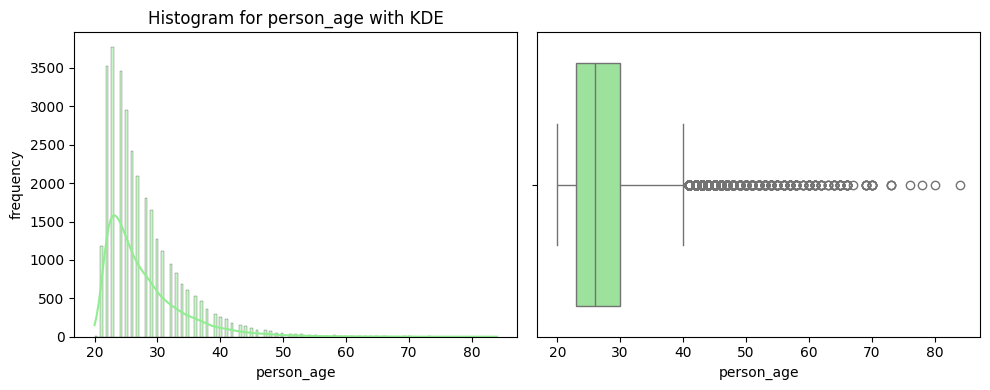

person_income
skew: 9.82


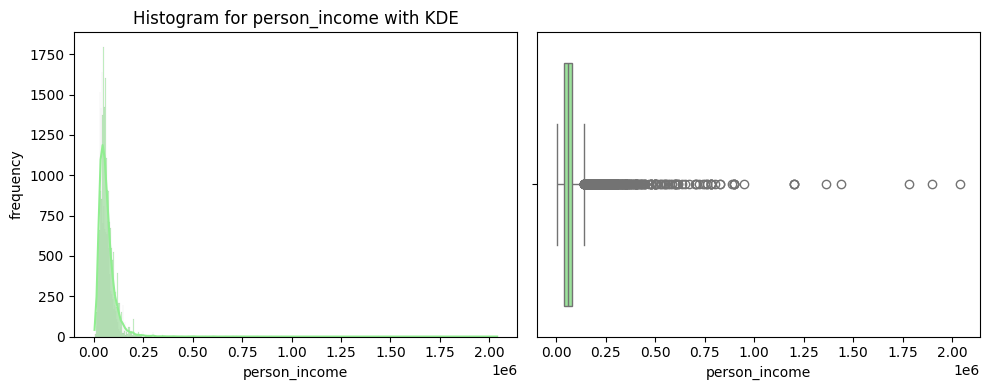

person_emp_length
skew: 1.25


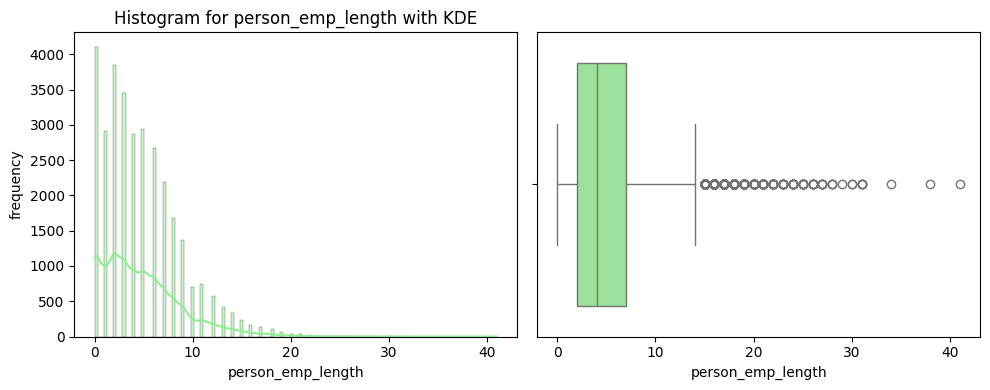

loan_amnt
skew: 1.18


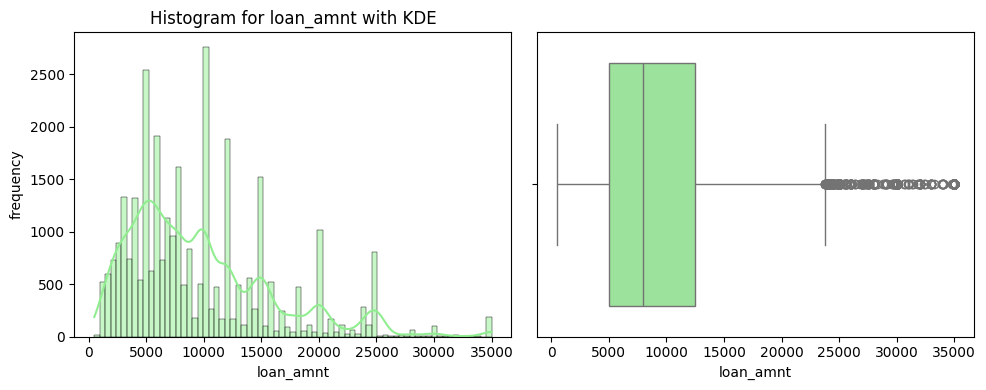

loan_int_rate
skew: 0.21


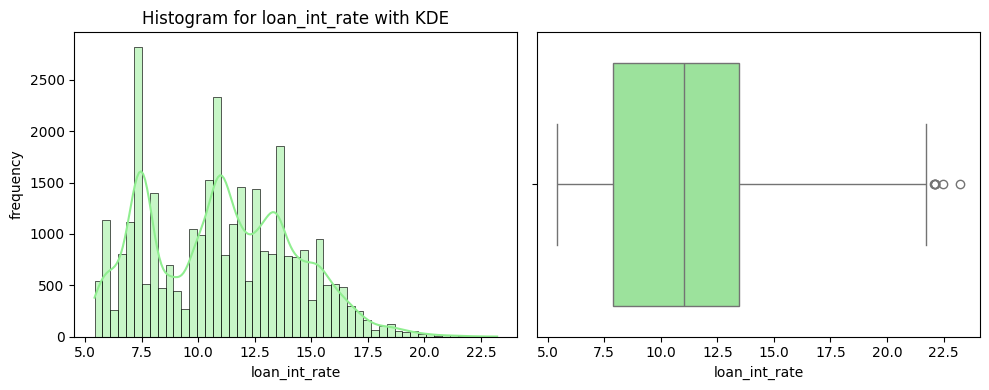

loan_percent_income
skew: 1.07


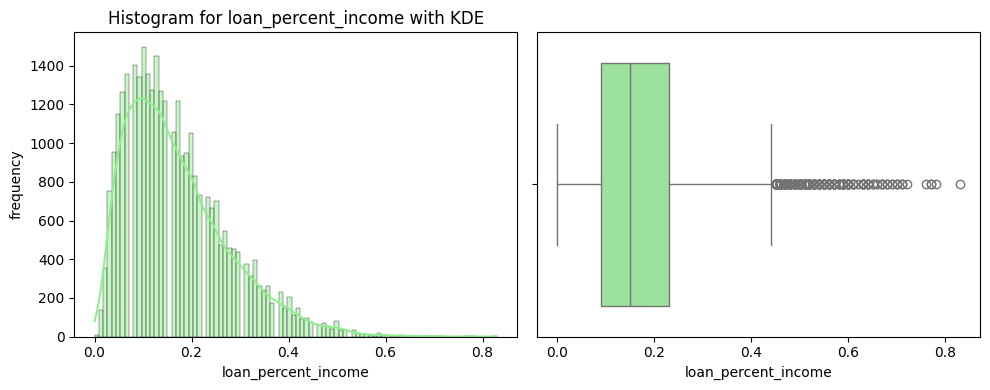

cb_person_cred_hist_length
skew: 1.66


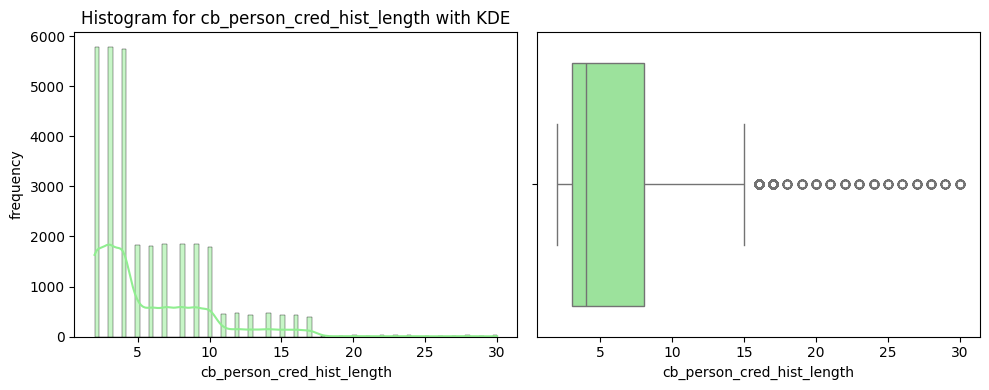

In [ ]:
num_col = ['person_age', 'person_income' , 'person_emp_length', 'loan_amnt' , 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length' ]
for col in num_col:
  print(col)
  print ('skew:' ,round(df[col].skew(),2))

#For Histogram :
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)

  sns.histplot(df[col], kde=True, color='lightgreen')
  plt.ylabel('frequency')
  plt.title(f'Histogram for {col} with KDE')

#For Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col], color ='lightgreen')
  plt.tight_layout()
  plt.show()


#b.  Bivariate Analysis

Categorical variable vs target variable

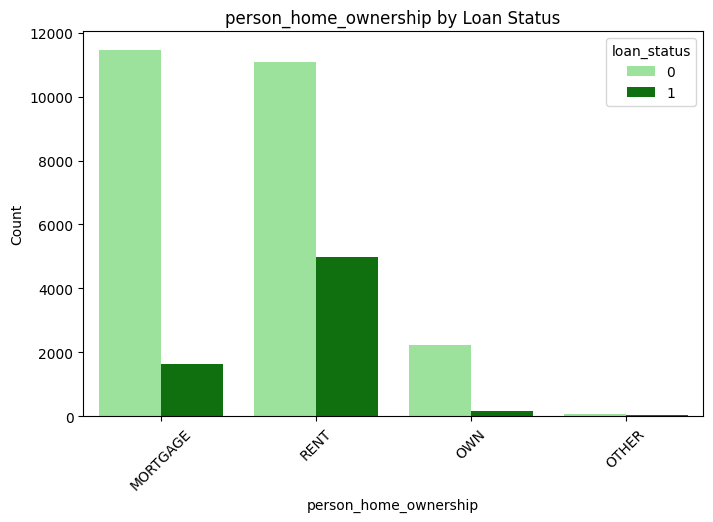

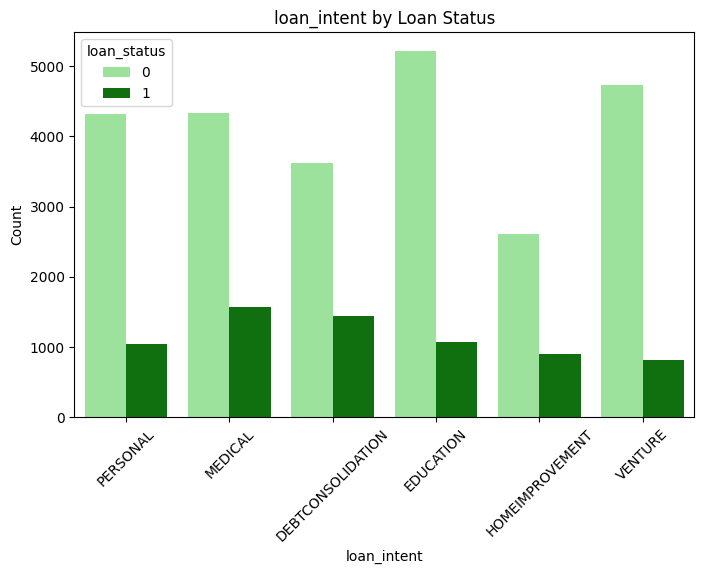

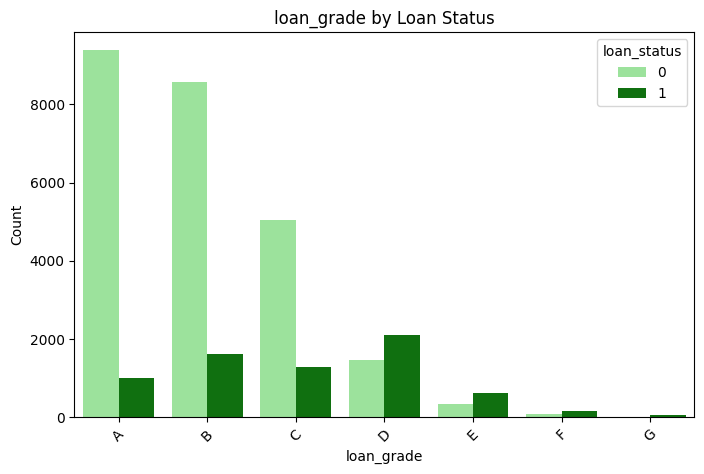

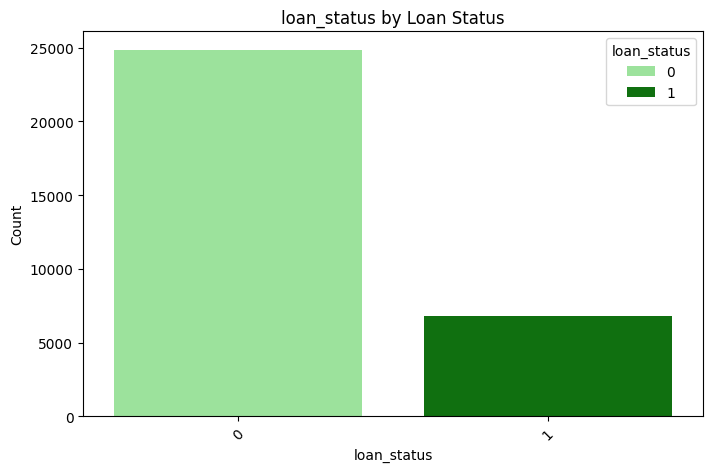

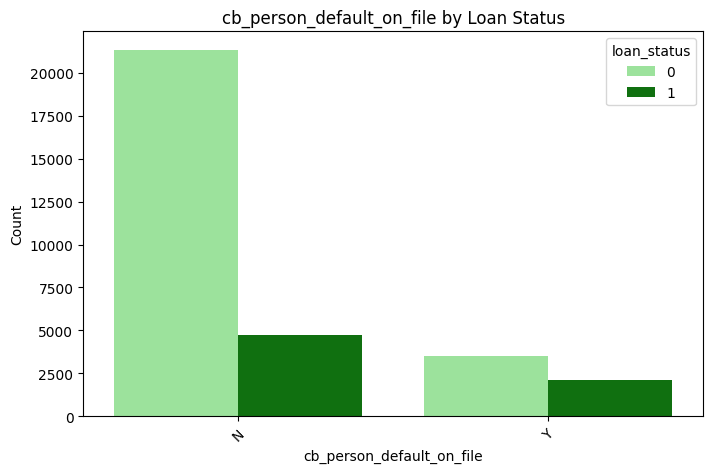

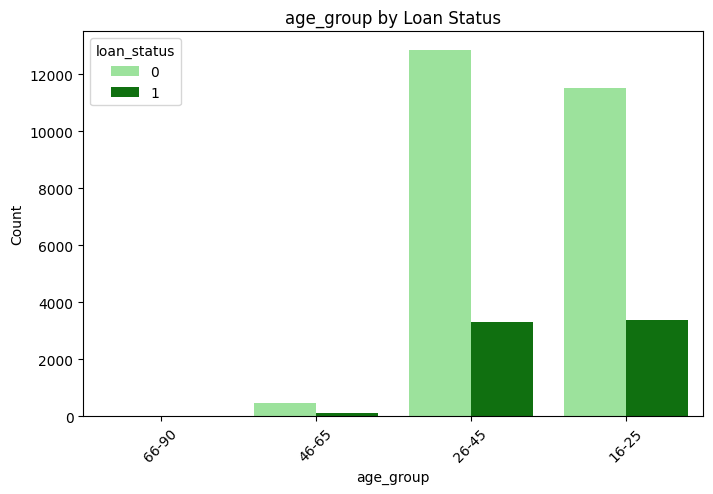

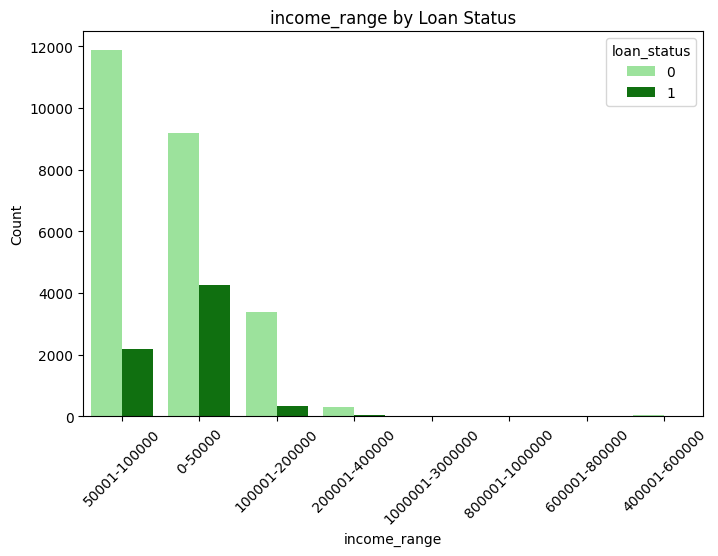

In [ ]:
for col in cat_col:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='loan_status', data=df, palette=["lightgreen", "green"])
    plt.title(f'{col} by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Numerical against target variable

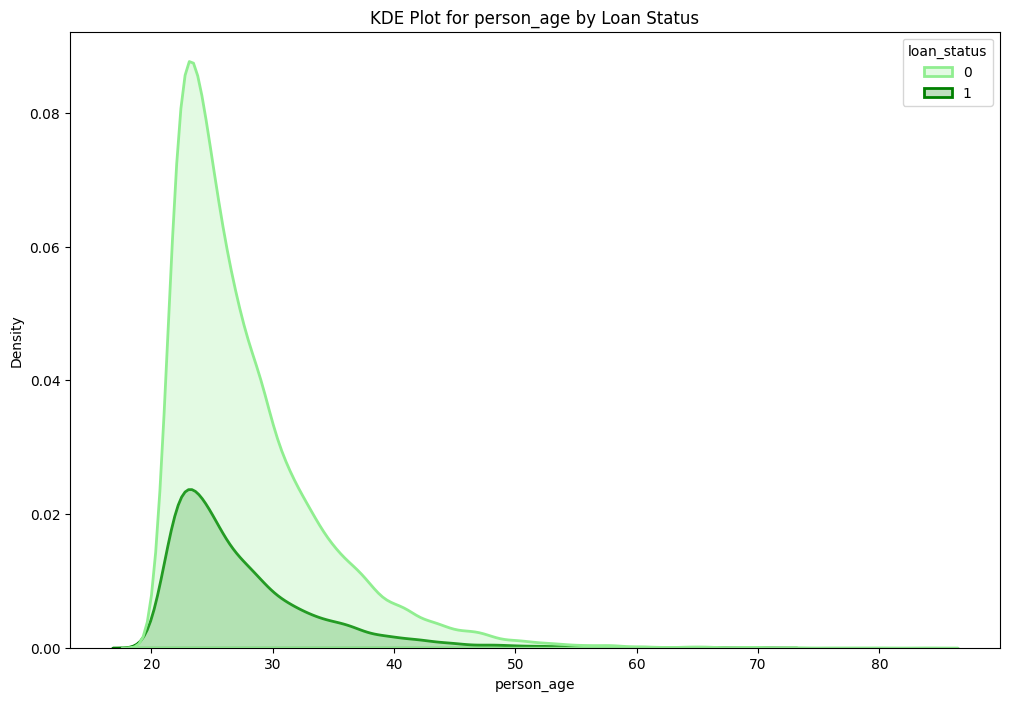

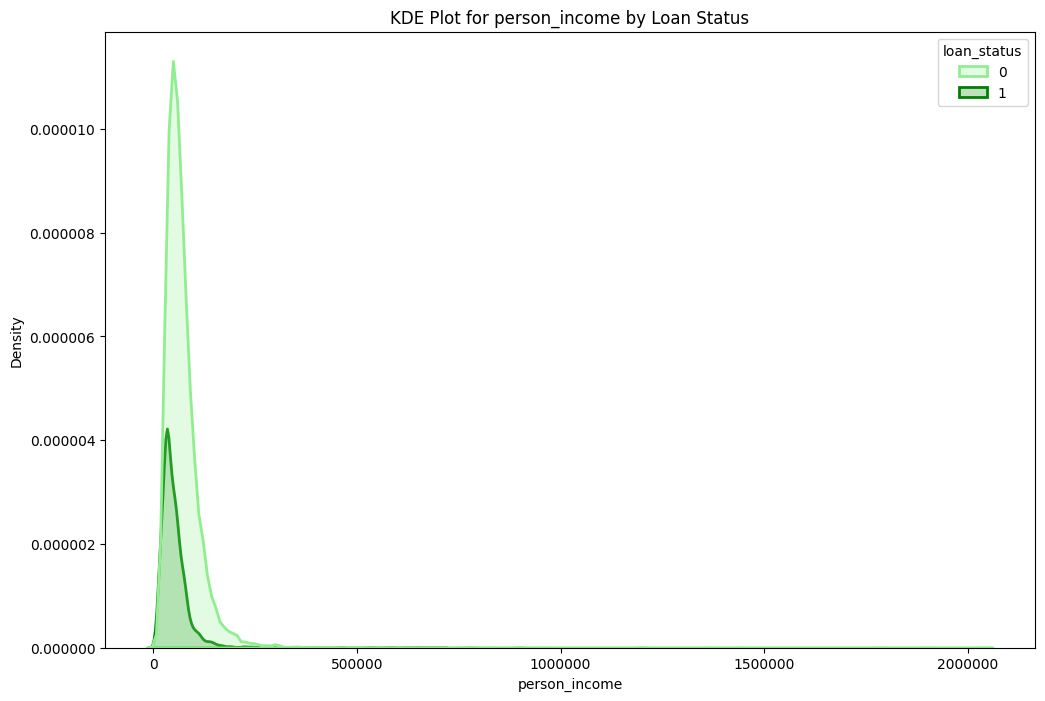

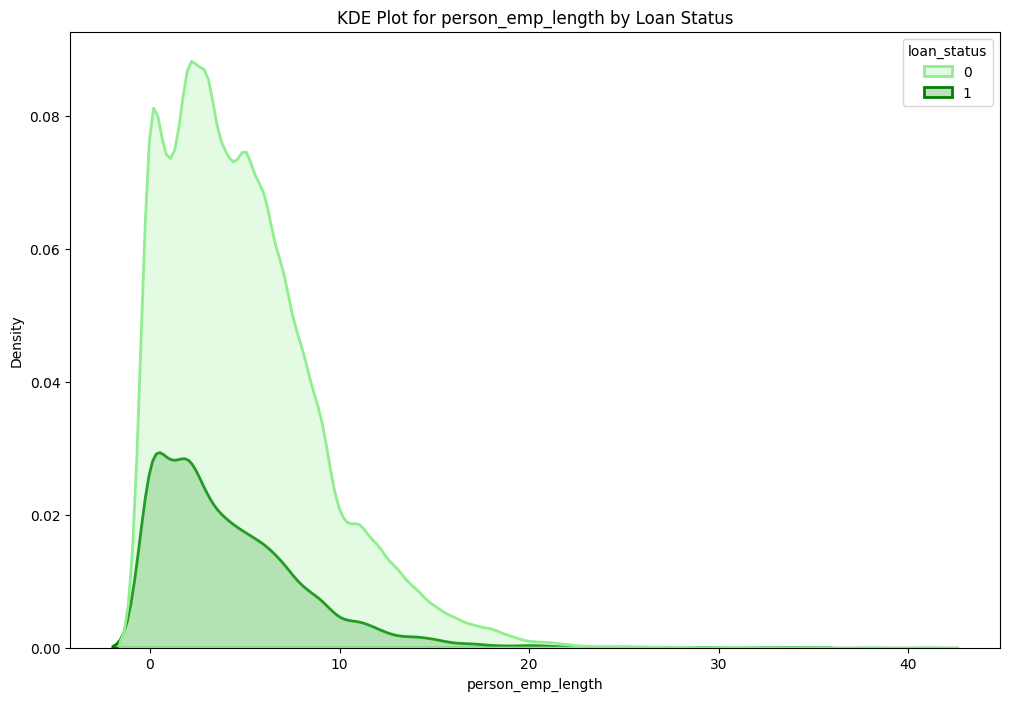

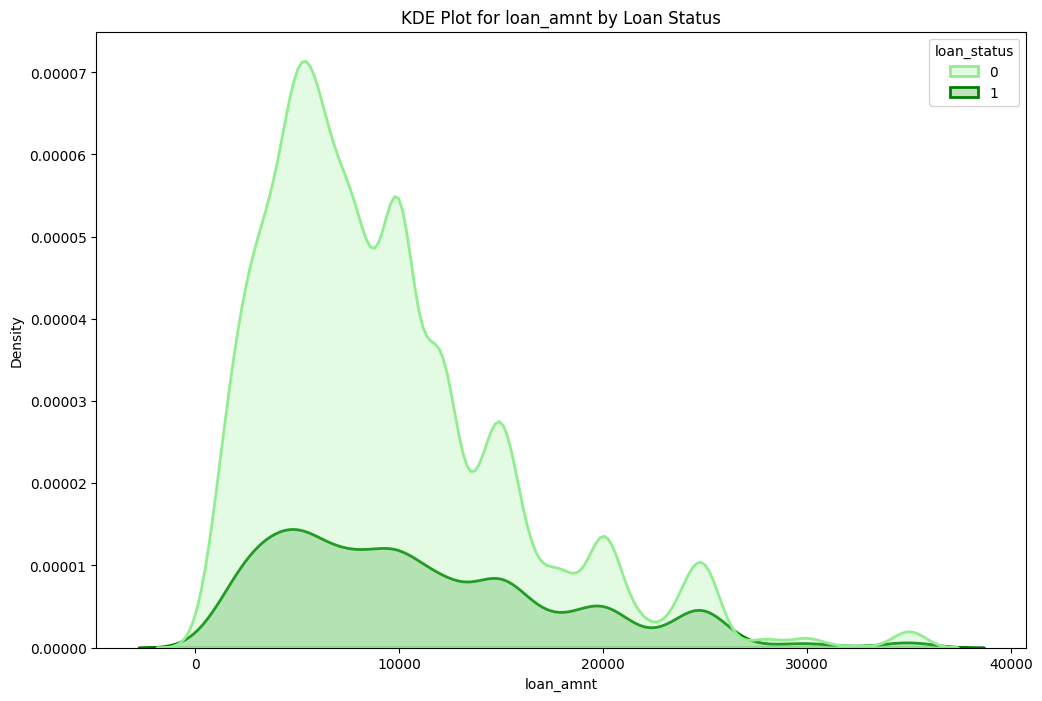

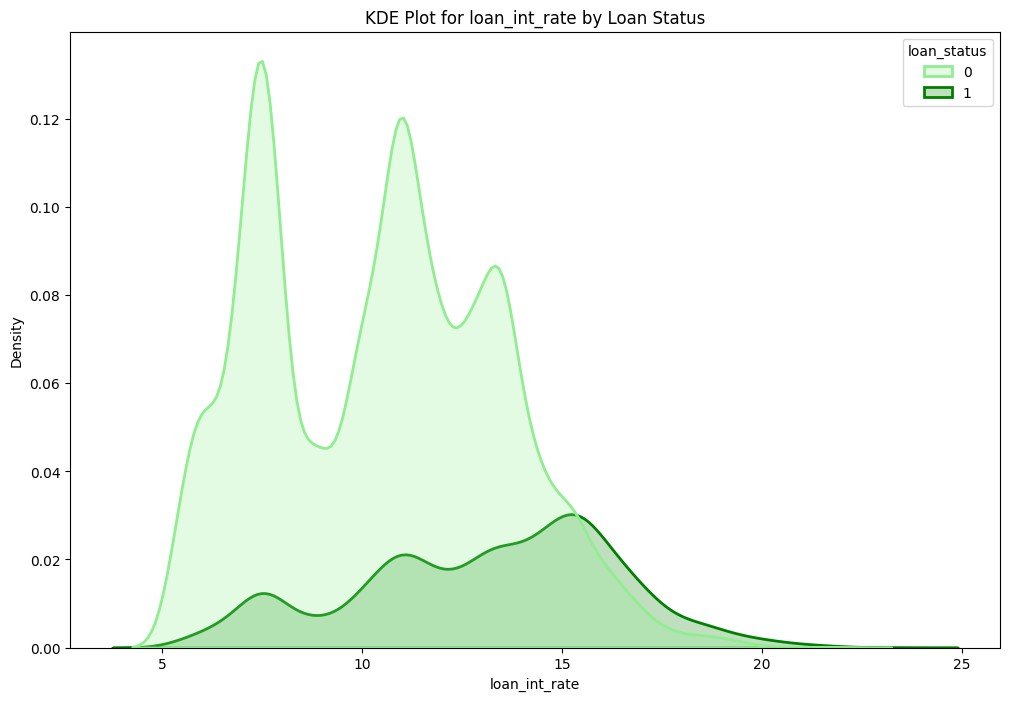

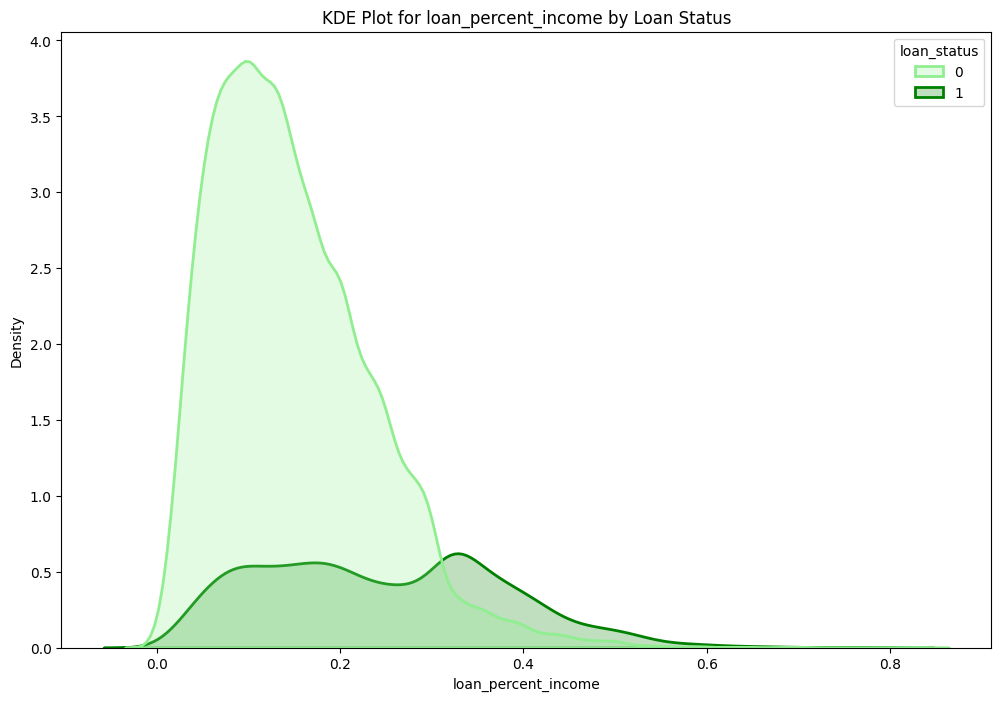

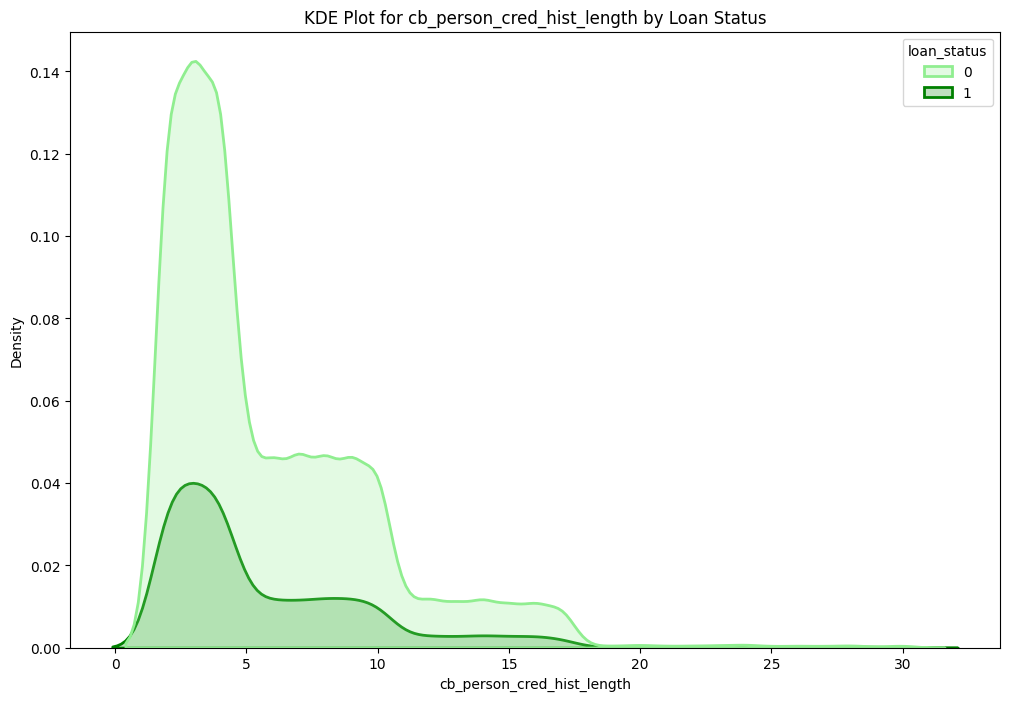

In [ ]:
for col in num_col:
#Density plot

    plt.figure(figsize=(12, 8))
    # KDE plot for loan_status = 0 and 1
    sns.kdeplot(data=df, x=col, hue='loan_status', fill=True, palette=['lightgreen', 'green'], linewidth=2)
    plt.title(f'KDE Plot for {col} by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.ticklabel_format(style='plain')


#c.  Multivariate Analysis

Correalation Matrix

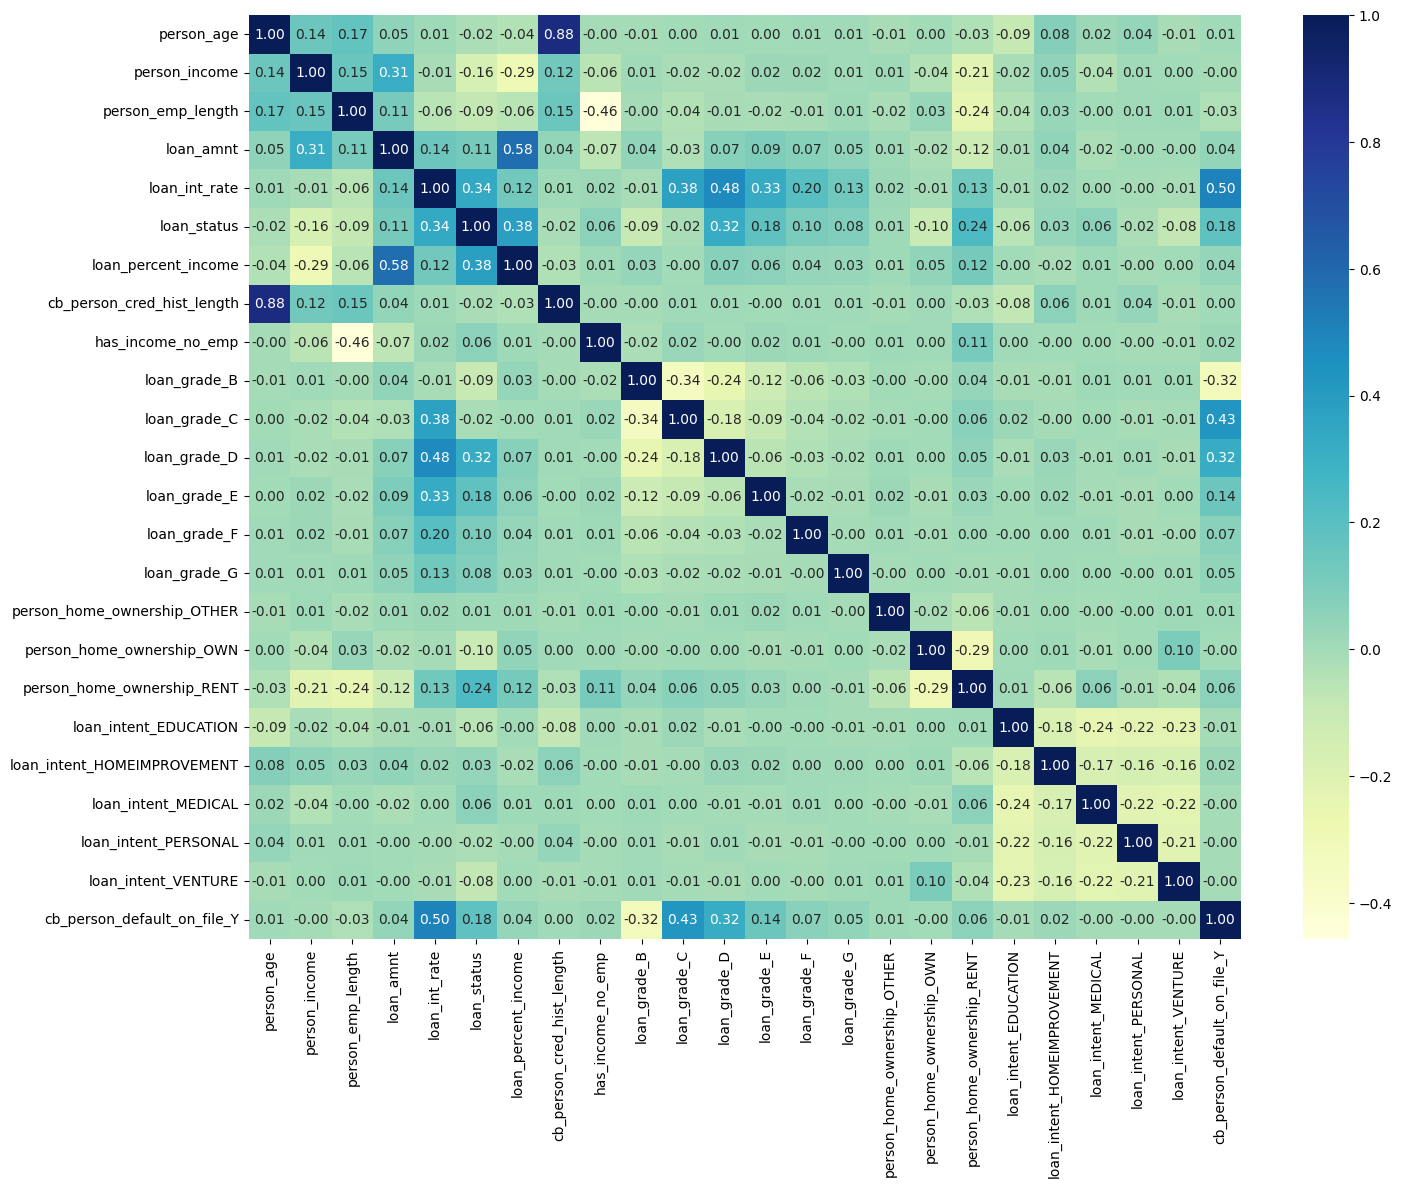

In [ ]:
columns_to_exclude = ['age_group', 'income_range']  # Specify columns to exclude
df_corr = df.drop(columns=columns_to_exclude)

# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df_corr, columns=['loan_grade' ,'person_home_ownership','loan_intent','cb_person_default_on_file'], drop_first=True)

# Include the target variable (loan_status) in the correlation analysis
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()



Investigating most corelated varaible with loan_status

Loan Interest Rate

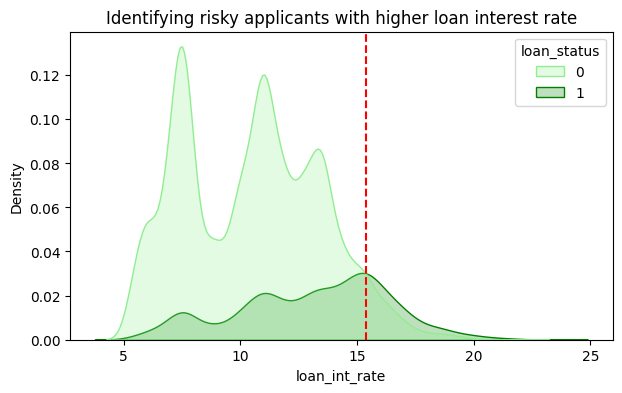

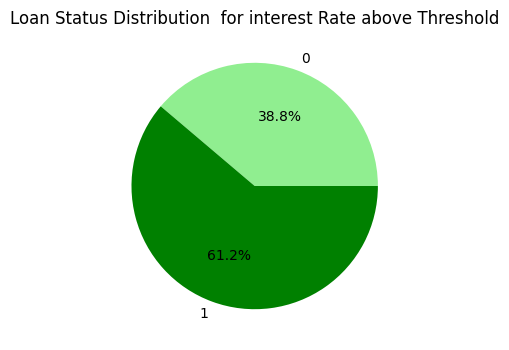

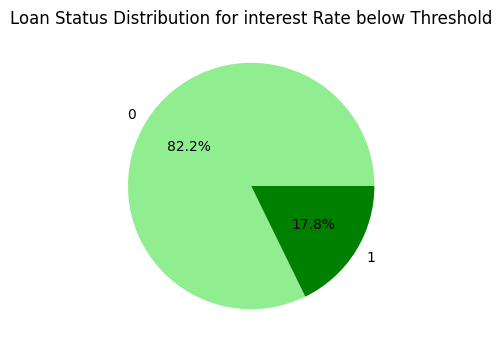

In [ ]:
#Setting Threshold of higher default
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x='loan_int_rate', hue='loan_status', fill=True, palette=['lightgreen', 'green'])
plt.title("Identifying risky applicants with higher loan interest rate")
plt.axvline(x=15.4, color='red', linestyle='--', label='Potential Threshold')
plt.show()

loan_int_above_threshold = df[df['loan_int_rate'] >= 15.4]
loan_int_below_threshold = df[df['loan_int_rate'] < 15.4]

loan_status_for_higher_int_rate = loan_int_above_threshold.groupby('loan_status').size()
loan_status_for_lower_int_rate = loan_int_below_threshold.groupby('loan_status').size()

plt.figure(figsize=(4, 4))
loan_status_for_higher_int_rate.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'green'])
plt.title('Loan Status Distribution  for interest Rate above Threshold')

plt.figure(figsize=(4, 4))
loan_status_for_lower_int_rate.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'green'])
plt.title('Loan Status Distribution for interest Rate below Threshold')
plt.show()

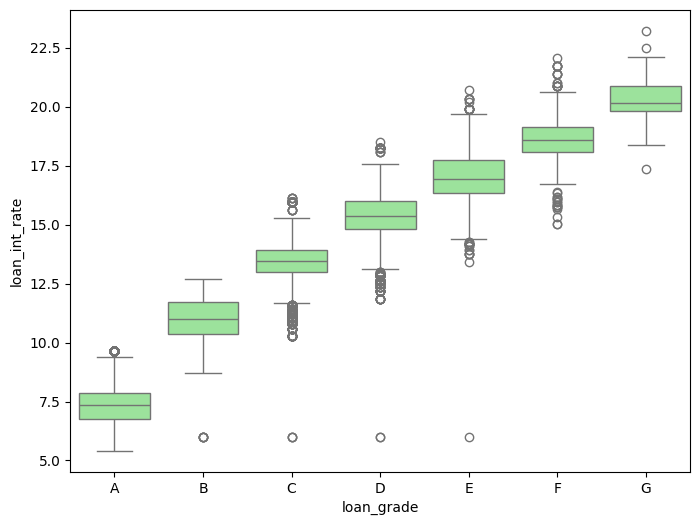

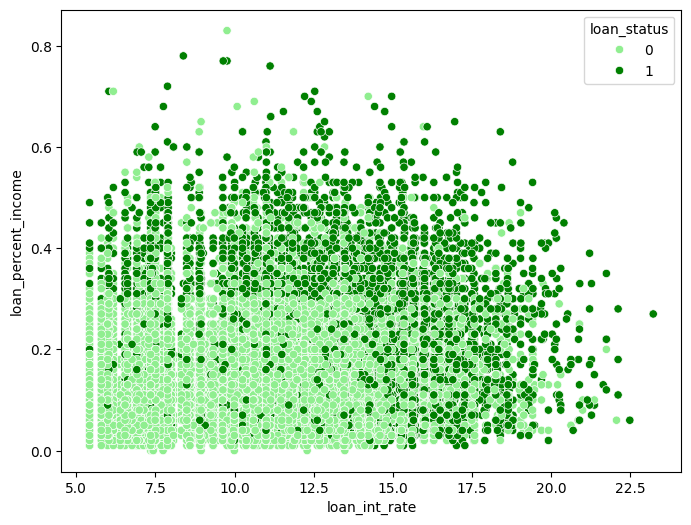

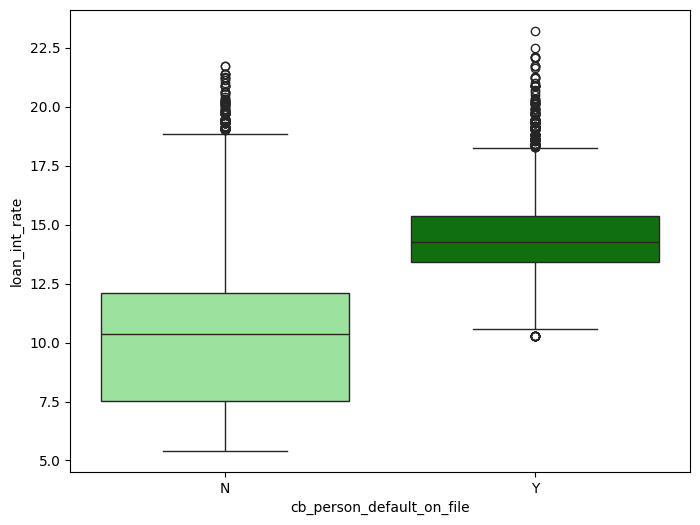

In [ ]:
# Create a boxplot to visualize the distribution of loan interest rates across different loan grades
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, palette=['lightgreen'], order=sorted(df['loan_grade'].unique()))
plt.show()

# Boxplot of loan_percent_income by loan interest rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_int_rate', y='loan_percent_income', data=df, hue= 'loan_status', palette=['lightgreen','green'])
plt.show()

# Assuming 'previous_defaults' is a binary feature (1 = defaulted before, 0 = no default)
plt.figure(figsize=(8, 6))
sns.boxplot(x='cb_person_default_on_file', y='loan_int_rate', data=df, palette=['lightgreen','green'])
plt.show()

Investigating loan_percent_income

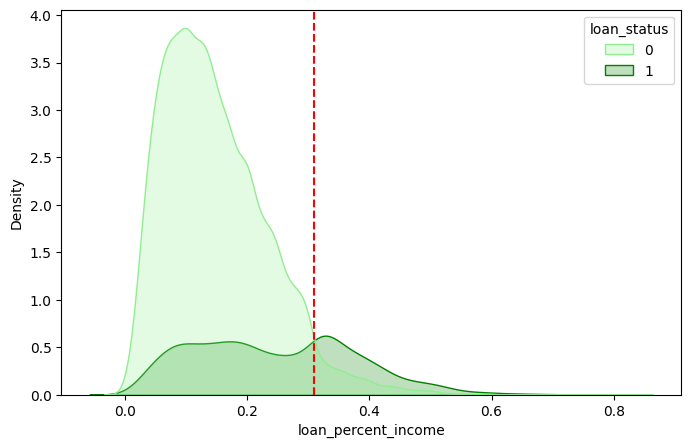

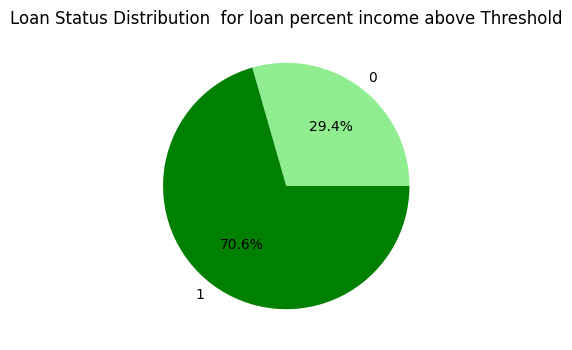

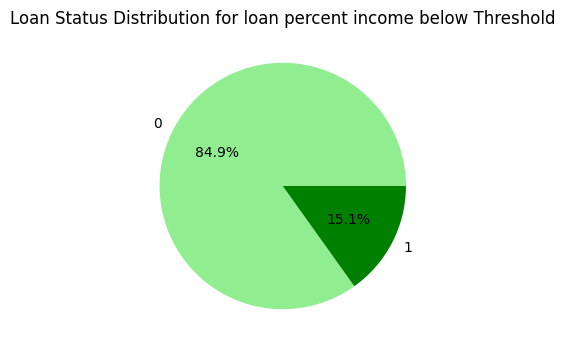

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='loan_percent_income', hue='loan_status', fill=True, palette=['lightgreen', 'green'])
plt.axvline(x=0.31, color='red', linestyle='--', label='Potential Threshold')
plt.show()

loan_percent_income_above_threshold = df[df['loan_percent_income'] >= 0.31]
loan_percent_income_below_threshold = df[df['loan_percent_income'] < 0.31]

loan_status_for_higher_loan_percent_income = loan_percent_income_above_threshold.groupby('loan_status').size()
loan_status_for_lower_loan_percent_income = loan_percent_income_below_threshold.groupby('loan_status').size()

plt.figure(figsize=(4, 4))
loan_status_for_higher_loan_percent_income.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'green'])
plt.title('Loan Status Distribution  for loan percent income above Threshold')

plt.figure(figsize=(4, 4))
loan_status_for_lower_loan_percent_income.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'green'])
plt.title('Loan Status Distribution for loan percent income below Threshold')
plt.show()

A higher loan percent income suggests that the borrower is spending a larger portion of their income on repaying the loan, which could indicate higher financial stress.
The high default rate (70.32%) among borrowers with loan percent income above 0.31 suggests that loans that represent a larger proportion of income are riskier.
This finding can guide lending policies, where borrowers with higher loan-to-income ratios may need additional scrutiny or higher interest rates to account for the increased risk

Seeing relationship between age group and income range against loan staus

In [ ]:
# Create crosstab to see default rates by age and income
crosstab = pd.crosstab([df['age_group'],df['income_range'] ], df['loan_status'], normalize='index')
print(crosstab)

loan_status                       0         1
age_group income_range                       
16-25     0-50000          0.673938  0.326062
          100001-200000    0.933539  0.066461
          200001-400000    0.905660  0.094340
          400001-600000    1.000000  0.000000
          50001-100000     0.844468  0.155532
26-45     0-50000          0.695659  0.304341
          1000001-3000000  1.000000  0.000000
          100001-200000    0.894399  0.105601
          200001-400000    0.869565  0.130435
          400001-600000    0.857143  0.142857
          50001-100000     0.847026  0.152974
          600001-800000    0.764706  0.235294
          800001-1000000   1.000000  0.000000
46-65     0-50000          0.650246  0.349754
          1000001-3000000  1.000000  0.000000
          100001-200000    0.863636  0.136364
          200001-400000    0.888889  0.111111
          400001-600000    1.000000  0.000000
          50001-100000     0.835570  0.164430
          600001-800000    1.00000

In [ ]:
renters_with_zero_emp_defaulting = df[(df['person_home_ownership'] == 'RENT') & (df['person_emp_length'] == 0) & (df['loan_status'] == 1)]
num_of_renters=  df[(df['person_home_ownership'] == 'RENT') & (df['person_emp_length'] == 0)]

num_renters_zero_emp_defaulting = renters_with_zero_emp_defaulting.shape[0]
total_renters =num_of_renters.shape[0]

# Print the number of renters who is missing employment history
print(f"Number of total renters with Zero Employment length: {total_renters:.2f}")

#print(f"Number of Renters with Employment length: {num_renters_with_emp_defaulting:.2f}")
print(f"Number of renters defaulting with Zero Employment length: {num_renters_zero_emp_defaulting}")

Number of total renters with Zero Employment length: 2666.00
Number of renters defaulting with Zero Employment length: 929


#Flagging risk factors

In [ ]:
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 6}
default_mapping = {'Y': 1, 'N': 0}
ownership_mapping= {'OWN': 1, 'MORTGAGE' : 2, 'RENT' : 3, 'OTHER' : 4 }

df['loan_grade_numeric'] = df['loan_grade'].map(grade_mapping)
df['prvs_default_numeric'] = df['cb_person_default_on_file'].map(default_mapping)
df['person_home_ownership_numeric'] = df['person_home_ownership'].map(ownership_mapping)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['loan_grade_numeric', 'loan_int_rate', 'loan_percent_income', 'prvs_default_numeric','person_home_ownership_numeric']])
df[['scaled_loan_grade_numeric', 'scaled_loan_int_rate', 'scaled_loan_percent_income', 'scaled_prvs_default_numeric','scaled_person_home_ownership_numeric']] = scaled_data

df['composite_risk_score'] = (
    (0.3 * df['scaled_loan_percent_income']) +
    (0.25 * df['scaled_loan_int_rate']) +
    (0.2 * df['scaled_loan_grade_numeric']) +
    (0.15 * df['scaled_person_home_ownership_numeric']) +
    (0.1 * df['scaled_prvs_default_numeric']))

bins = [0, 3, 5, 7, 10]  # Define bins for risk categories
labels = ['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
df['risk_category'] = pd.cut(df['composite_risk_score'], bins=bins, labels=labels)

df.head(15)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade_numeric,prvs_default_numeric,person_home_ownership_numeric,scaled_loan_grade_numeric,scaled_loan_int_rate,scaled_loan_percent_income,scaled_prvs_default_numeric,scaled_person_home_ownership_numeric,composite_risk_score,risk_category
0,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,...,1,0,2,0.0,0.117416,0.132530,0.0,0.333333,0.119113,Low Risk
1,80,64000,RENT,7.0,MEDICAL,B,6800,11.710000,0,0.11,...,2,0,3,0.2,0.353371,0.132530,0.0,0.666667,0.268102,Low Risk
2,78,48000,RENT,41.0,MEDICAL,A,3000,7.510000,0,0.06,...,1,0,3,0.0,0.117416,0.072289,0.0,0.666667,0.151041,Low Risk
3,76,75000,RENT,23.0,MEDICAL,A,15000,8.940000,0,0.20,...,1,0,3,0.0,0.197753,0.240964,0.0,0.666667,0.221727,Low Risk
4,73,42000,MORTGAGE,7.0,PERSONAL,A,5000,7.490000,0,0.12,...,1,0,2,0.0,0.116292,0.144578,0.0,0.333333,0.122447,Low Risk
5,73,75000,RENT,0.0,MEDICAL,A,7800,7.347094,0,0.10,...,1,0,3,0.0,0.108264,0.120482,0.0,0.666667,0.163211,Low Risk
6,73,39240,RENT,0.0,MEDICAL,B,1800,12.530000,0,0.05,...,2,0,3,0.2,0.399438,0.060241,0.0,0.666667,0.257932,Low Risk
7,70,30000,RENT,1.0,MEDICAL,B,5000,10.960000,0,0.17,...,2,0,3,0.2,0.311236,0.204819,0.0,0.666667,0.279255,Low Risk
8,70,44000,MORTGAGE,3.0,PERSONAL,C,7000,11.660000,0,0.16,...,3,0,2,0.4,0.350562,0.192771,0.0,0.333333,0.275472,Low Risk
9,70,42000,RENT,1.0,MEDICAL,B,8000,9.630000,0,0.19,...,2,0,3,0.2,0.236517,0.228916,0.0,0.666667,0.267804,Low Risk


In [ ]:
features_to_drop = ['age_group','scaled_loan_grade_numeric', 'scaled_loan_int_rate', 'scaled_loan_percent_income', 'scaled_prvs_default_numeric','scaled_person_home_ownership_numeric','loan_amnt' , 'loan_grade_numeric',
                    'prvs_default_numeric','person_home_ownership_numeric','has_income_no_emp','income_range','risk_category']

df.drop(columns=features_to_drop, inplace=True)
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,composite_risk_score
0,84,94800,MORTGAGE,2.0,PERSONAL,A,7.51,0,0.11,N,24,0.119113
1,80,64000,RENT,7.0,MEDICAL,B,11.71,0,0.11,N,25,0.268102
2,78,48000,RENT,41.0,MEDICAL,A,7.51,0,0.06,N,25,0.151041
3,76,75000,RENT,23.0,MEDICAL,A,8.94,0,0.20,N,25,0.221727
4,73,42000,MORTGAGE,7.0,PERSONAL,A,7.49,0,0.12,N,28,0.122447


# Pedictive Model

1.RandomForestClassifier

In [ ]:
# Perform train-test split
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']  # Define the target variable

X = pd.get_dummies(X, drop_first=True)

# Now you can proceed with train-test split and model training as before

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# Apply StandardScaler to your dataset
scaler = StandardScaler()

# Fit and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the test set
X_test = scaler.transform(X_test)

#Building & training the model
model= RandomForestClassifier(class_weight='balanced', n_estimators =100, random_state =42)
model.fit(X_train, y_train)

#Making Prediction
y_pred = model.predict(X_test)

#Evaluating model

accuracy= accuracy_score(y_test , y_pred)
print(f"\nModel Accuracy : {accuracy:.2f}")

#classification report

print(classification_report(y_test, y_pred))


y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probabilities for class 1 (the positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

#y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)




Model Accuracy : 0.93
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7456
           1       0.96      0.72      0.82      2048

    accuracy                           0.93      9504
   macro avg       0.94      0.86      0.89      9504
weighted avg       0.94      0.93      0.93      9504

Optimal Threshold: 0.31
[[7392   64]
 [ 568 1480]]
                        Feature  Importance
6          composite_risk_score    0.192316
4           loan_percent_income    0.174957
1                 person_income    0.150656
3                 loan_int_rate    0.126518
2             person_emp_length    0.053566
0                    person_age    0.050731
9    person_home_ownership_RENT    0.042213
5    cb_person_cred_hist_length    0.039405
17                 loan_grade_D    0.037475
16                 loan_grade_C    0.022136
14          loan_intent_VENTURE    0.015755
11  loan_intent_HOMEIMPROVEMENT    0.014361
8     person_home_ownership

2.KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy= accuracy_score(y_test , y_pred)
print(f"\nModel Accuracy : {accuracy:.2f}")

print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probabilities for class 1 (the positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

#y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, y_pred))




Model Accuracy : 0.90
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7456
           1       0.92      0.59      0.71      2048

    accuracy                           0.90      9504
   macro avg       0.91      0.79      0.83      9504
weighted avg       0.90      0.90      0.89      9504

Optimal Threshold: 0.3333333333333333
[[7345  111]
 [ 847 1201]]


3. LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy= accuracy_score(y_test , y_pred)
print(f"\nModel Accuracy : {accuracy:.2f}")

print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probabilities for class 1 (the positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

#y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, y_pred))





Model Accuracy : 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7456
           1       0.78      0.55      0.64      2048

    accuracy                           0.87      9504
   macro avg       0.83      0.75      0.78      9504
weighted avg       0.86      0.87      0.86      9504

Optimal Threshold: 0.3051534421075522
[[7142  314]
 [ 929 1119]]


4. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy= accuracy_score(y_test , y_pred)
print(f"\nModel Accuracy : {accuracy:.2f}")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probabilities for class 1 (the positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

#y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)




Model Accuracy : 0.89
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7456
           1       0.72      0.76      0.74      2048

    accuracy                           0.89      9504
   macro avg       0.83      0.84      0.83      9504
weighted avg       0.89      0.89      0.89      9504

Optimal Threshold: 1.0
[[6855  601]
 [ 491 1557]]
                        Feature  Importance
4           loan_percent_income    0.233424
3                 loan_int_rate    0.164540
1                 person_income    0.125313
9    person_home_ownership_RENT    0.125252
6          composite_risk_score    0.070905
2             person_emp_length    0.052159
0                    person_age    0.045266
16                 loan_grade_C    0.032487
5    cb_person_cred_hist_length    0.025820
12          loan_intent_MEDICAL    0.025224
11  loan_intent_HOMEIMPROVEMENT    0.023729
17                 loan_grade_D    0.020454
13         loan_intent_PERSO

5. GradientBoostingClassifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy= accuracy_score(y_test , y_pred)
print(f"\nModel Accuracy : {accuracy:.2f}")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probabilities for class 1 (the positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_prob) #find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

#y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, y_pred))



Model Accuracy : 0.94
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7456
           1       0.95      0.74      0.83      2048

    accuracy                           0.94      9504
   macro avg       0.94      0.87      0.90      9504
weighted avg       0.94      0.94      0.93      9504

Optimal Threshold: 0.23688259720802307
[[7379   77]
 [ 526 1522]]
